In [ ]:
import numpy as np
from numpy import pi,cos,sin,sqrt
np.set_printoptions(precision=6)
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import importlib
import MagnetClass

In [2]:
importlib.reload(MagnetClass)
from MagnetClass import Magnet,compoundMagnet,magneticCmap,plot_linearmap

# Magnet test

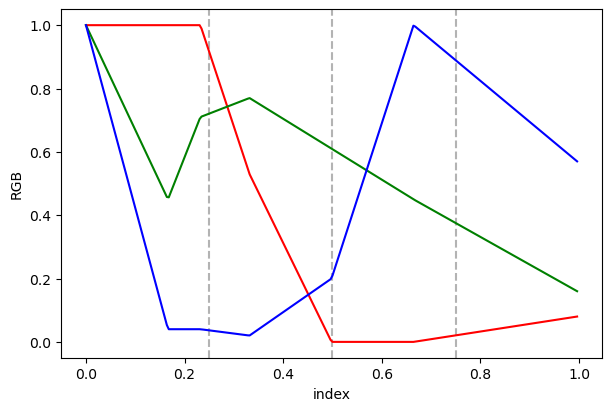

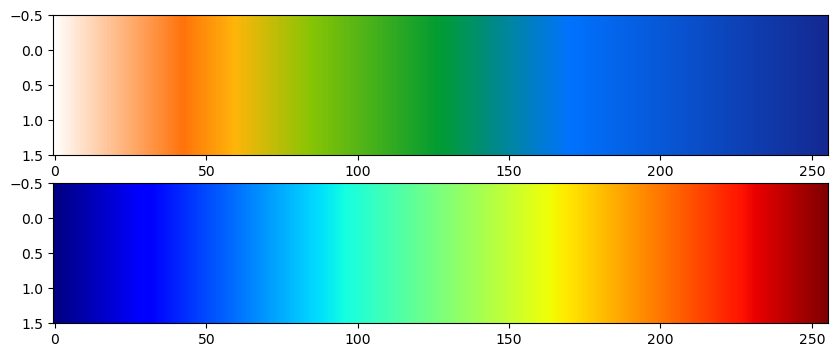

In [8]:
plot_linearmap(magneticCmap)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
fig, ax = plt.subplots(nrows=2, figsize=(10, 4))
ax[0].imshow(gradient, aspect='auto', cmap=magneticCmap)
ax[1].imshow(gradient, aspect='auto', cmap='jet')
plt.show()

In [ ]:
# gravity acceleration is 9807 mm/s^2
data=[
  (10,10,52.5),
  (10,16,57.5),
  (6,10,45),
  (3,10,37.5),
  (3,13,40),
  (16,10,61),
  (10,13,55),
  (13,13,60),
]
accelerations=[]
for lowerThickness,upperThickness,endDistance in data:
  distance=endDistance-lowerThickness/2-upperThickness/2
  lowerMagnet=Magnet(lowerThickness,10)
  upperMagnet=Magnet(upperThickness,10)
  force=lowerMagnet.forceAndTorque(distance,0,floatMagnet=upperMagnet)[2] # unit g*mm/s^2
  mass=upperMagnet.Mass # unit is g
  acc=force/mass # unit is mm/s^2
  accelerations.append(-acc)
  print(-acc)
accelerations=np.array(accelerations)
np.sum(accelerations)/len(accelerations)

10189.815478327593
9033.659427699877
10304.771968564597
10158.280613886296
9439.033481724418
10555.597186089872
9559.333693153143
9299.798093970188


9817.536242926999

# Feedback along x axis

In [6]:
zLowerBound,zHigherBound,xLowerBound,xHigherBound=10,80,0,70
z_offset,x_offset=int(zLowerBound),int(xLowerBound)
z_step,x_step=2,2
z_count=int(np.ceil((zHigherBound-zLowerBound)/z_step)+1)
x_count=int(np.ceil((xHigherBound-xLowerBound)/x_step)+1)
print(z_offset,x_offset,z_step,x_step,z_count,x_count)

10 0 2 2 36 36


In [11]:
BigMagnet=Magnet(9,15,4.5)
BigMagnet.genCache('magneticFieldCache/BigMagnet.csv',[z_offset,x_offset,z_step,x_step,z_count,x_count],override=True)

In [32]:
floatMagnet=Magnet(5,30)
z=24
xOffset=27
linearizationBig=BigMagnet.LinearizationA(z,xOffset,floatMagnet=floatMagnet)
print(linearizationBig)

[  2397.529392  16993.527697    274.813468 -20224.406274  -4953.528742
  12561.348981]


In [37]:
z=-15
x=4
rotation=np.array([
        [cos(0.1),0,sin(0.1)],
        [0,1,0],
        [-sin(0.1),0,cos(0.1)]])
x2,_,z2=rotation.T@np.array([x,0,z])
x3,_,z3=rotation@np.array([x,0,z])
dBdx=((floatMagnet.magneticField(z,x-0.1)-floatMagnet.magneticField(z,x))/0.1)
dBdry=((rotation@floatMagnet.magneticField(z2,x2)-rotation.T@floatMagnet.magneticField(z3,x3))/0.2)
print(dBdx)
print(dBdry)
dVdB=1.8*10**-3
dIdV=7 #A/V
currentPart=dIdV*dVdB*np.array([[dBdx[0],dBdry[0]]])
print(currentPart)

[25.926456 -0.       10.703425]
[ 85.376908   0.       154.311359]
[[0.326673 1.075749]]


In [23]:
zLowerBound,zHigherBound,xLowerBound,xHigherBound=10,30,0,40
z_offset,x_offset=int(zLowerBound),int(xLowerBound)
z_step,x_step=2,2
z_count=int(np.ceil((zHigherBound-zLowerBound)/z_step)+1)
x_count=int(np.ceil((xHigherBound-xLowerBound)/x_step)+1)
print(z_offset,x_offset,z_step,x_step,z_count,x_count)

10 0 2 2 11 21


In [ ]:
coilMagnet=Magnet(12,19,wireDiameter=0.4,radiusCount=15,currentDensity=1/0.4)
coilMagnet.genCache('magneticFieldCache/CoilMagnet.csv',[z_offset,x_offset,z_step,x_step,z_count,x_count])

In [38]:
coilB=coilMagnet.LinearizationB(20,17,floatMagnet=floatMagnet)
print(coilB)
feedback=2*np.array([[coilB[0,0]],[coilB[4,0]]])@currentPart
print(feedback)

[[-3982.197458  3982.197458     0.          -0.      ]
 [   -0.           0.       -3982.197458  3982.197458]
 [-1826.255848 -1826.255848 -1826.255848 -1826.255848]
 [    0.          -0.        -192.310475   192.310475]
 [  192.310475  -192.310475     0.          -0.      ]]
[[-2601.755549 -8567.690223]
 [  125.645413   413.75562 ]]


In [39]:
linearizationTotal=linearizationBig[:4]+feedback.flatten()
print(linearizationTotal)
print(linearizationTotal[0]*linearizationTotal[3]-linearizationTotal[1]*linearizationTotal[2])

[  -204.226157   8425.837474    400.458882 -19810.650654]
671651.5953457355


# Feedback along z axis

In [4]:
availableMagnet=[
    (4.8,25,12),
    (3,23,18),
    (2.5,22,14),
    (3.8,20,14.8),
    (3,15,10),
    (3,13,11),
    (3,18,6),
    (2,13,7),
    (5,8,4),
]

In [3]:
zLowerBound,zHigherBound,xLowerBound,xHigherBound=10,80,0,70
z_offset,x_offset=int(zLowerBound),int(xLowerBound)
z_step,x_step=2,2
z_count=int(np.ceil((zHigherBound-zLowerBound)/z_step)+1)
x_count=int(np.ceil((xHigherBound-xLowerBound)/x_step)+1)
print(z_offset,x_offset,z_step,x_step,z_count,x_count)

10 0 2 2 36 36


In [ ]:
BigMagnet12=Magnet(12,15,5.5)
BigMagnet12.genCache('magneticFieldCache/magnet12_15_5p5.csv',[z_offset,x_offset,z_step,x_step,z_count,x_count])
BigMagnet15=Magnet(15,15,5.5)
BigMagnet15.genCache('magneticFieldCache/magnet15_15_5p5.csv',[z_offset,x_offset,z_step,x_step,z_count,x_count])

In [ ]:
zAxis=np.linspace(21,51,11)
output5=[]
offset=6.5
for z in zAxis:
    magnets=[
        (z-1.5+offset,Magnet(3,23,18),-1),
        (z-1.5,Magnet(8,5,2),1),
    ]
    temp=compoundMagnet(magnets,BigMagnet15,0)
    magnets=[
        (z+offset,Magnet(3,23,18),-1),
        (z,Magnet(8,5,2),1),
    ]
    temp+=compoundMagnet(magnets,BigMagnet12,25)

    output5.append(temp)
output5=np.array(output5).reshape((-1,6))

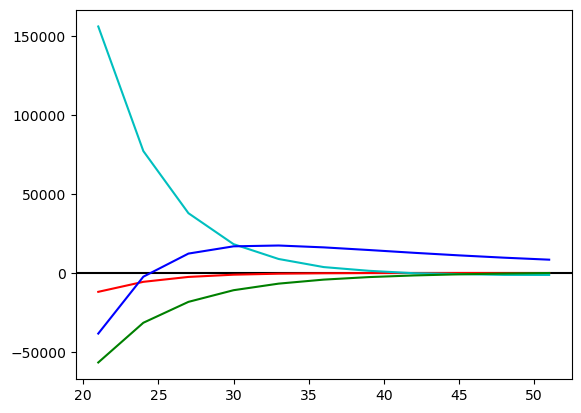

In [110]:
plt.axhline(y=0,color='k')
plt.plot(zAxis[:],output5[:,0],'r')
plt.plot(zAxis[:],output5[:,1],'c')
plt.plot(zAxis[:],output5[:,3],'g')
plt.plot(zAxis[:],output5[:,5],'b')
plt.show()

In [115]:
z=31.5
offset=6.5
magnets=[
        (z+offset,Magnet(3,23,18),-1),
        (z,Magnet(8,5,2),1),
    ]
L1=compoundMagnet(magnets,BigMagnet15,0)
print(L1)
z=33
magnets=[
        (z+offset,Magnet(3,23,18),-1),
        (z,Magnet(8,5,2),1),
    ]
L2=compoundMagnet(magnets,BigMagnet12,25)
print(L2)
L3=L1+L2
print(L3)
print(L3[0]*L3[3]-L3[1]*L3[2])

[  -706.081504  19548.737768    341.704192 -11269.46854     614.86456
   3845.111899]
[   448.054607 -11123.808966   -223.244623   4968.570114   -862.926673
  14417.712173]
[ -258.026897  8424.928802   118.459569 -6300.898426  -248.062113
 18262.824072]
627787.8316409676


In [114]:
z=33
offset=9
magnets=[
        (z+offset,Magnet(3,23,18),-1),
        (z,Magnet(6,5,2),1),
    ]
L1=compoundMagnet(magnets,BigMagnet12,0)
print(L1)
z=35
magnets=[
        (z+offset,Magnet(3,23,18),-1),
        (z,Magnet(6,5,2),1),
    ]
L2=compoundMagnet(magnets,BigMagnet12,30)
print(L2)
L3=L1+L2
print(L3)
print(L3[0]*L3[3]-L3[1]*L3[2])

[ -221.066134  9318.676596   147.307954 -5564.498026    38.316224
  4567.295052]
[  146.264304 -7281.196097  -129.903192  4506.577904  -267.625639
  8207.006381]
[  -74.80183   2037.4805      17.404762 -1057.920122  -229.309415
 12774.301433]
43672.49819001491


# Levitron

In [6]:
zLowerBound,zHigherBound,xLowerBound,xHigherBound=10,80,0,70
z_offset,x_offset=int(zLowerBound),int(xLowerBound)
z_step,x_step=2,2
z_count=int(np.ceil((zHigherBound-zLowerBound)/z_step)+1)
x_count=int(np.ceil((xHigherBound-xLowerBound)/x_step)+1)
print(z_offset,x_offset,z_step,x_step,z_count,x_count)

10 0 2 2 36 36


In [ ]:
BigMagnet12=Magnet(12,15,5.5)
BigMagnet12.genCache('magneticFieldCache/magnet12_15_5p5.csv',[z_offset,x_offset,z_step,x_step,z_count,x_count])

In [ ]:
zAxis=np.linspace(20,50,11)
output1=[]
output4=[]
offset=3
for z in zAxis:
    magnets=[
        (z,Magnet(3,23,18),-1),
        (z+3.5,Magnet(2,5,2),1),
        (z-1.5,Magnet(6,5,2),1),
    ]
    output1.append(compoundMagnet(magnets,BigMagnet12,0))
    output4.append(compoundMagnet(magnets,BigMagnet12,30))
output1=np.array(output1).reshape((-1,6))
output4=np.array(output4).reshape((-1,6))

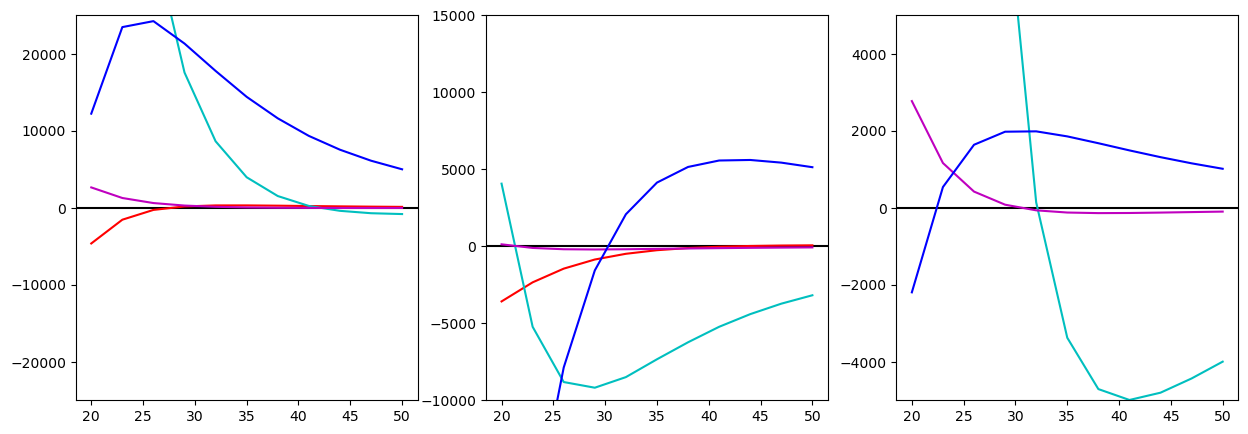

In [105]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].axhline(y=0,color='k')
ax[0].plot(zAxis[:],output1[:,0],'r')
ax[0].plot(zAxis[:],output1[:,1],'c')
ax[0].plot(zAxis[:],output1[:,2],'m')
# ax[0].plot(zAxis[:],output1[:,3],'g')
ax[0].plot(zAxis[:],output1[:,5],'b')
ax[0].set_ylim([-25000, 25000])

ax[1].axhline(y=0,color='k')
ax[1].plot(zAxis[:],output4[:,0],'r')
ax[1].plot(zAxis[:],output4[:,1],'c')
ax[1].plot(zAxis[:],output4[:,2],'m')
# ax[1].plot(zAxis[:],output4[:,3],'g')
ax[1].plot(zAxis[:],output4[:,5],'b')
ax[1].set_ylim([-10000, 15000])

ax[2].axhline(y=0,color='k')
ax[2].plot(zAxis[:],output1[:,1]+output4[:,1],'c')
ax[2].plot(zAxis[:],output1[:,2]+output4[:,2],'m')
ax[2].plot(zAxis[:],(output1[:,5]+output4[:,5])/10,'b')
ax[2].set_ylim([-5000, 5000])

plt.show()

In [117]:
z=31
magnets=[
        (z,Magnet(3,23,18),-1),
        (z+3.5,Magnet(2,5,2),1),
        (z-1.5,Magnet(6,5,2),1),
    ]
L1=compoundMagnet(magnets,BigMagnet12,0)
print(L1)
magnets=[
        (z,Magnet(3,23,18),-1),
        (z+3.5,Magnet(2,5,2),1),
        (z-1.5,Magnet(6,5,2),1),
    ]
L2=compoundMagnet(magnets,BigMagnet12,30)
print(L2)
L3=L1+L2
print(L3)
print(L3[0]*L3[3]-L3[1]*L3[2])

[  281.503041 11818.406313   182.280535 -8441.394728 -1249.067492
 19866.877373]
[ -628.311955 -9183.520679  -209.39255  12940.59626   1174.829572
  1078.954475]
[ -346.808914  2634.885634   -27.112015  4499.201533   -74.23792
 20945.831847]
-1488926.138793417


In [116]:
z=31
magnets=[
        (z,Magnet(3,23,18),-1),
        (z,Magnet(8,5,2),1),
    ]
L1=compoundMagnet(magnets,BigMagnet12,0)
print(L1)
# z=30
magnets=[
        (z,Magnet(3,23,18),-1),
        (z,Magnet(8,5,2),1),
    ]
L2=compoundMagnet(magnets,BigMagnet12,30)
print(L2)
L3=L1+L2
print(L3)
print(L3[0]*L3[3]-L3[1]*L3[2])

[  368.124712 10689.83935    157.415283 -7929.52602  -1380.138401
 20725.8988  ]
[ -642.378834 -8858.658076  -203.489037 12939.37432   1200.573342
   824.167796]
[ -274.254122  1831.181274   -46.073754  5009.848299  -179.565058
 21550.066597]
-1289602.1527469987


In [55]:
z=30
magnets=[
        (z,Magnet(3,23,18),-1),
        (z,Magnet(6,5,2),1),
    ]
L1=compoundMagnet(magnets,BigMagnet12,0)
print(L1)
z=30
magnets=[
        (z,Magnet(3,23,18),-1),
        (z,Magnet(6,5,2),1),
    ]
L2=compoundMagnet(magnets,BigMagnet12,30)
print(L2)
L3=L1+L2
print(L3)
print(L3[0]*L3[3]-L3[1]*L3[2])

[  844.571191 10674.053017   135.880596 -7946.595873 -2258.50593
 29288.373948]
[ -938.444511 -8985.752106  -196.506579 14467.35079   1737.000114
 -1629.735347]
[  -93.873321  1688.300911   -60.625983  6520.754917  -521.505816
 27658.638601]
-509770.01440797595
